In [1]:
# setup
import matplotlib.pyplot as plt
import geopandas
%matplotlib inline

In [2]:
# load sample data
nybb_path = geopandas.datasets.get_path('nybb')
boros = geopandas.read_file(nybb_path)
boros.set_index('BoroCode', inplace=True)

## geopandas --- data structure

In [3]:
boros

,BoroName,Shape_Leng,Shape_Area,geometry
BoroCode,,,,
5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


In [4]:
boros['geometry'].values

<GeometryArray>
Length: 5, dtype: geometry

## geopandas ― visualization w/Matplotlib

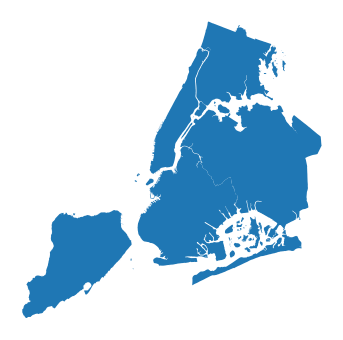

In [5]:
# create figure
fig = plt.figure(figsize=(6, 6))

# add plot
ax = fig.add_subplot(1, 1, 1)

# plot boroughs
boros.plot(figsize=(5, 5), ax=ax)

# axes options
ax.axis('off')

# show plot
plt.show()

## Geopandas example: Adding a background map to plots

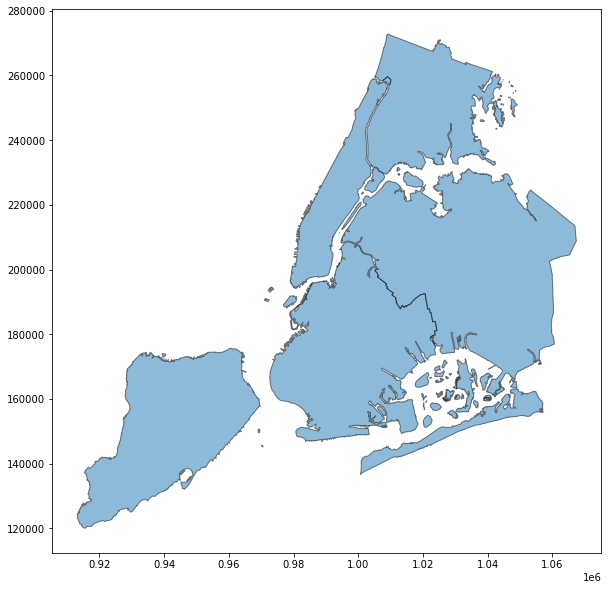

In [6]:
'''
Let's use the NYC borough boundary data that is available in geopandas
datasets. Plotting this gives the following result:
'''

import geopandas
df = geopandas.read_file(geopandas.datasets.get_path('nybb'))
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

In [7]:
'''
Convert the data to Web Mercator
================================

Web map tiles are typically provided in
`Web Mercator <https://en.wikipedia.org/wiki/Web_Mercator>`__
(`EPSG 3857 <https://epsg.io/3857>`__), so we need to make sure to convert
our data first to the same CRS to combine our polygons and background tiles
in the same map:

'''


df = df.to_crs(epsg=3857)

# extracting certain relevant portion of the photography about the ways our data have been encoded.
# crs = coordinate reference system, has been adopted to express all the longtitude and latitude data composing the
# polygons for the various administrative areas

In [9]:
# retrieving a relevant portion of the photography to use as a layer in the previous chart

'''
Contextily helper function
==========================

We define a small helper function that uses
`contextily <https://github.com/darribas/contextily>`__ to add a map
as background to an existing plot: 

'''

import contextily as ctx

# ax = the polygons that we want to superimpose to the photography
# zoom = certain target level of zoom
# url = photo which we retrieve the relevant portion of the photography

def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
    
    # identify the bounding box of our plot
    # max and min of longtitude and latitude
    xmin, xmax, ymin, ymax = ax.axis()
    
    # use ctx to retrieve the portion of the photography associated with the bounding box 
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    
    # superimpose your plot to the photography
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))

D:\Anaconda\envs\SMM635 - DV\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
D:\Anaconda\envs\SMM635 - DV\lib\site-packages\contextily\tile.py:268: FutureWarning: The url format using 'tileX', 'tileY', 'tileZ' as placeholders is deprecated. Please use '{x}', '{y}', '{z}' instead.
  FutureWarning,


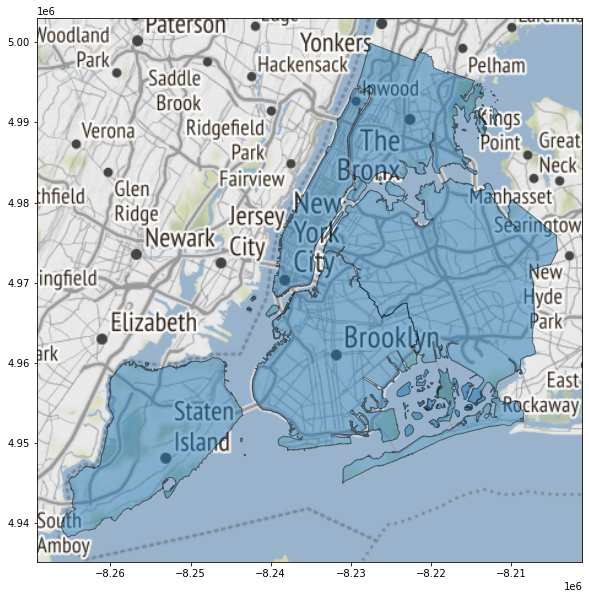

In [10]:

'''
Add background tiles to plot
============================

Now we can use the above function to easily add a background map to our
plot. The `zoom` keyword is required and let's you specify the detail of the
map tiles (be careful to not specify a too high `zoom` level, as this can
result in a large download):
'''


ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
add_basemap(ax, zoom=10)

D:\Anaconda\envs\SMM635 - DV\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The "contextily.tile_providers" module is deprecated and will be removed in contextily v1.1. Please use "contextily.providers" instead.
  import sys


TypeError: add_basemap() got an unexpected keyword argument 'rl'

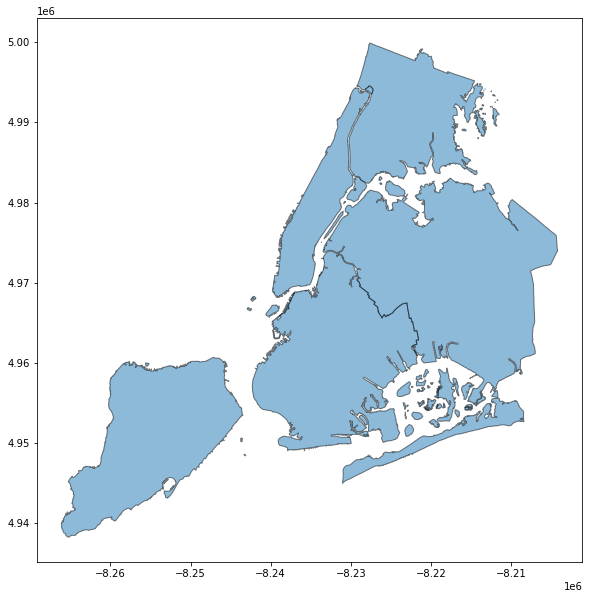

In [11]:
'''
By default, contextily uses the Stamen Terrain style. We can specify a
different style using ``ctx.sources``:
'''
    
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
add_basemap(ax, zoom=11,  rl=ctx.sources.ST_TONER_LITE)
ax.set_axis_off()